# Polynomial Regression

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [15]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree = 2)), ('mode', LinearRegression())]

In [16]:
pipe = Pipeline(Input)

## Create a list of the independent variables (responsible variables)

In [18]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

## Create the series of the predictor (price)

In [19]:
Y = df['price']

### We can normalize the data, perform a transform and fit the model simultaneously.

In [32]:
pipe.fit(Z,Y) # recall fit is training the model

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('mode', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

### Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [33]:
ypipe = pipe.predict(Z)

In [35]:
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

## Plot the actual values versus the predicted values

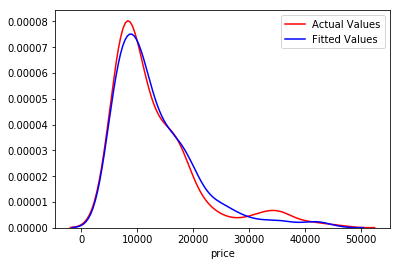

In [38]:
ax1 = sns.distplot(Y, hist = False, color = 'r', label = 'Actual Values')
sns.distplot(ypipe, hist= False, color = 'b', label = 'Fitted Values', ax = ax1)
plt.show()

#### Notice this model is much more accurate than the MLR or SLR models.